In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('content/creditcard.csv')

In [55]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [56]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [57]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [58]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [59]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

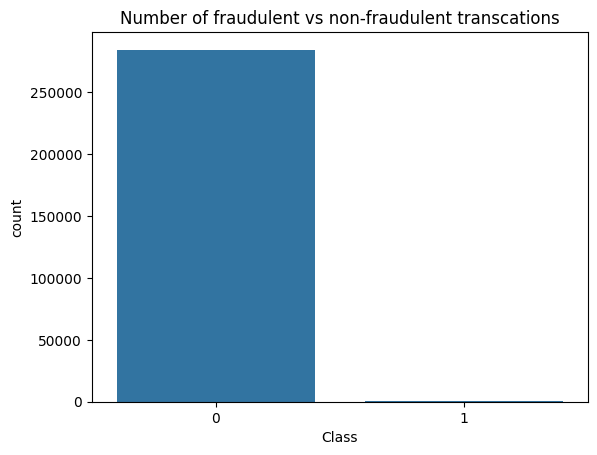

In [60]:
sns.countplot(x='Class', data=credit_card_data)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

In [61]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [62]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [63]:
legit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [64]:
legit.Amount.info()

<class 'pandas.core.series.Series'>
Index: 284315 entries, 0 to 284806
Series name: Amount
Non-Null Count   Dtype  
--------------   -----  
284315 non-null  float64
dtypes: float64(1)
memory usage: 4.3 MB


In [65]:
# statistical measures of the data
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [66]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


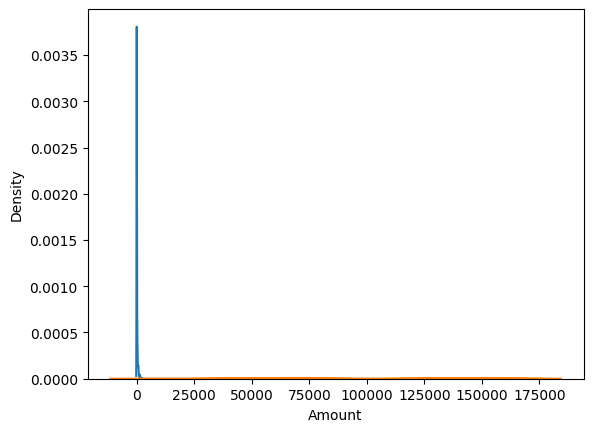

In [67]:
import seaborn as sns

# For fraudulent amount (without histogram)
ax = sns.kdeplot(fraud['Amount'], label='fraudulent')

# For non-fraudulent amount (without histogram)
ax = sns.kdeplot(legit['Time'], label='non-fraudulent')


In [68]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [69]:
# Number of Fraudulent Transactions --> 492
legit_sample = legit.sample(n=492)

In [70]:
# Concatenating two DataFrames
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [71]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
65001,51394.0,-5.430029,-5.748051,1.666783,-0.389158,0.231856,0.699394,1.258394,-0.767047,0.422256,...,-0.902039,1.037984,2.748222,-0.233297,1.073512,-0.231751,-0.437701,0.409840,388.91,0
215544,140116.0,1.728173,-0.581622,-1.484144,0.093095,0.846254,1.402320,-0.164815,0.431953,0.381731,...,-0.067091,-0.073446,0.295388,-1.746556,-0.524521,0.403546,-0.021436,-0.081135,70.85,0
148735,90160.0,0.081018,0.894070,-0.160411,-0.862489,1.333926,0.299652,0.774361,0.007135,0.998982,...,-0.429483,-0.878976,-0.017873,-0.412896,-0.368262,0.113777,0.209954,0.077949,8.99,0
252405,155793.0,1.158340,-2.910488,-3.065164,-0.990983,-0.948512,-1.661886,1.008450,-0.955797,-2.308883,...,0.517727,0.627867,-0.725886,0.162418,0.443500,0.227429,-0.186204,0.026284,659.02,0
79182,57905.0,0.882320,-1.651070,0.671698,-0.260636,-1.614110,0.063170,-0.797050,0.027307,0.162339,...,0.120951,-0.062904,-0.284224,-0.101433,0.355991,-0.238261,0.003783,0.064355,266.92,0


In [72]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [73]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [74]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94939.217480,-0.068201,0.015289,0.091479,0.014610,-0.049672,-0.015010,0.032344,0.001427,0.056316,...,0.026671,0.038017,0.006861,-0.023619,-0.025827,-0.028007,0.011209,-0.010364,0.018779,92.495711
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [75]:
#Splitting the data into Features & Targets
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [76]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
65001    51394.0 -5.430029 -5.748051  1.666783 -0.389158  0.231856  0.699394   
215544  140116.0  1.728173 -0.581622 -1.484144  0.093095  0.846254  1.402320   
148735   90160.0  0.081018  0.894070 -0.160411 -0.862489  1.333926  0.299652   
252405  155793.0  1.158340 -2.910488 -3.065164 -0.990983 -0.948512 -1.661886   
79182    57905.0  0.882320 -1.651070  0.671698 -0.260636 -1.614110  0.063170   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [77]:

print(Y)

65001     0
215544    0
148735    0
252405    0
79182     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [78]:
#stratify to ensure same proportion in both test and train and random_state is used so they split data
#  is same every time
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [79]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,87843.012195,-2.420075,1.819534,-3.470901,2.278319,-1.600449,-0.706373,-2.768194,0.286031,-1.262404,...,0.199495,0.375803,0.010455,-0.031963,-0.065478,0.006721,0.031428,0.080106,0.047223,107.353516
std,47968.361129,5.515258,3.760469,6.253995,3.201887,4.195835,1.734298,5.864047,4.860396,2.335457,...,1.149386,2.795685,1.176728,1.186917,0.557654,0.678170,0.473935,1.019977,0.419878,309.536420
min,406.000000,-30.552380,-22.225978,-31.103685,-3.291865,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-4.290857,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.180822,-7.263482,-2.043794,0.000000
25%,47894.500000,-2.885613,-0.111858,-5.120349,-0.062049,-1.812957,-1.572363,-3.105154,-0.217680,-2.324444,...,-0.197265,-0.170500,-0.539103,-0.252309,-0.397141,-0.304412,-0.293081,-0.068041,-0.054962,1.187500
50%,79608.500000,-0.795338,0.994292,-1.323414,1.318995,-0.481170,-0.661768,-0.647789,0.140434,-0.687410,...,0.030119,0.156803,0.053843,-0.047000,-0.003826,0.044466,-0.014283,0.057503,0.044914,16.040000
75%,135451.750000,0.926316,2.814266,0.461804,4.313236,0.480074,0.050924,0.288875,0.890812,0.219426,...,0.444010,0.674054,0.598747,0.190727,0.349305,0.378938,0.347205,0.457194,0.224424,99.990000
max,172397.000000,2.307376,22.057729,3.415156,12.114672,11.095089,6.584327,10.166877,20.007208,5.498786,...,13.907843,27.202839,8.361985,5.466230,1.198619,2.208209,2.745261,3.052358,1.999108,6998.000000


In [80]:
X_test.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,88100.741117,-2.685434,2.047785,-3.787057,2.322265,-1.886609,-0.684150,-3.144286,0.226608,-1.323342,...,0.182858,0.296254,0.042212,0.038271,-0.063449,0.022471,-0.000105,0.038717,-0.009341,86.472386
std,47891.756303,5.868914,3.693097,6.694905,3.436461,4.447585,1.713013,6.320710,5.007191,2.659969,...,1.214337,2.874748,1.182704,0.878989,0.567008,0.644595,0.495776,1.109981,0.471649,199.775935
min,2205.000000,-29.876366,-7.196980,-30.558697,-3.199930,-21.665654,-5.566870,-43.557242,-41.044261,-13.320155,...,-4.290857,-22.797604,-8.887017,-5.988806,-1.582723,-2.925077,-1.094655,-5.682338,-2.043794,0.000000
25%,45501.000000,-3.240187,0.044655,-5.458230,-0.047660,-1.905923,-1.670381,-3.485680,-0.222299,-2.387567,...,-0.230640,-0.243618,-0.521934,-0.265272,-0.406166,-0.287382,-0.331514,-0.064021,-0.082216,1.000000
50%,82289.000000,-0.797454,1.036129,-1.572939,1.384394,-0.433002,-0.615622,-0.743358,0.192988,-0.776806,...,-0.015144,0.130063,0.165682,-0.036490,-0.035426,-0.038665,-0.104393,0.048933,0.016014,11.400000
75%,134897.000000,0.920417,3.129852,0.589932,4.173516,0.466750,0.011725,0.274998,0.865075,0.424897,...,0.424608,0.641211,0.594214,0.199119,0.406158,0.414818,0.302809,0.465299,0.166796,92.700000
max,169375.000000,2.200490,22.057729,3.121086,11.927512,4.676533,6.474115,3.791907,19.587773,5.498786,...,11.059004,27.202839,8.316275,5.466230,1.158320,2.156042,1.884741,2.245091,1.999108,1916.000000


In [81]:
Y.describe()

count    984.000000
mean       0.500000
std        0.500254
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

In [82]:
Y_test.describe()

count    197.000000
mean       0.497462
std        0.501267
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

In [83]:
model = LogisticRegression()

In [84]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/Users/preraksingla11/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [86]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.940279542566709


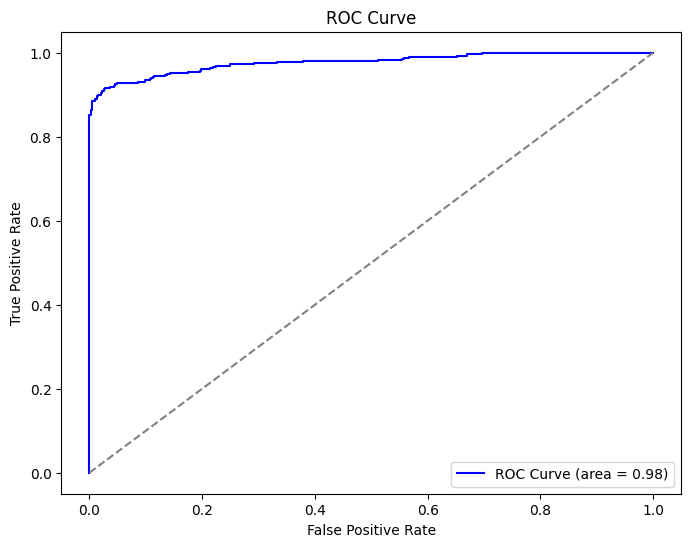

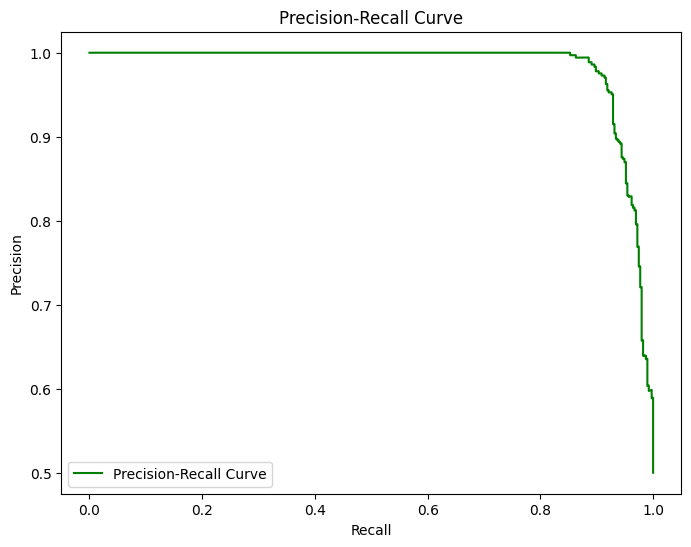

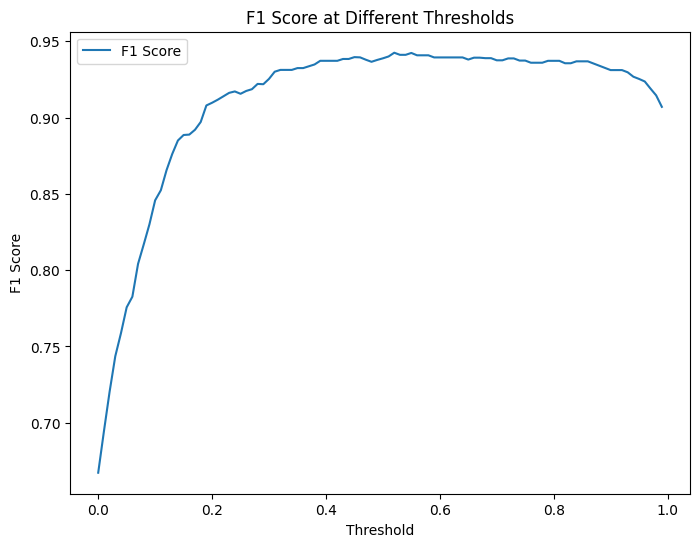

Optimal threshold: 0.52
Classification Report with Threshold = 0.52:

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       393
           1       0.97      0.92      0.94       394

    accuracy                           0.94       787
   macro avg       0.95      0.94      0.94       787
weighted avg       0.95      0.94      0.94       787



In [87]:
# Predict probabilities (output between 0 and 1)
y_probs = model.predict_proba(X_train)[:, 1]  # Probabilities for the positive class (fraud)

# Plot ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds_roc = roc_curve(Y_train, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot Precision-Recall curve
from sklearn.metrics import precision_recall_curve, f1_score, classification_report

precision, recall, thresholds_pr = precision_recall_curve(Y_train, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label=f'Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Finding the optimal threshold using F1-Score
thresholds = np.arange(0.0, 1.0, 0.01)
f1_scores = [f1_score(Y_train, (y_probs >= t).astype(int)) for t in thresholds]

# Plot F1-scores to visualize the optimal threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score at Different Thresholds')
plt.legend()
plt.show()

# Find the threshold with the highest F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f'Optimal threshold: {optimal_threshold:.2f}')

# Make predictions using the optimal threshold
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

# Evaluate the model
print(f"Classification Report with Threshold = {optimal_threshold:.2f}:\n")
print(classification_report(Y_train, y_pred_optimal))


In [88]:
print('Accuracy score on Test Data : ', training_data_accuracy)

Accuracy score on Test Data :  0.940279542566709


In [89]:
# Predict probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (fraud)

threshold = 0.56

# Apply the custom threshold to make predictions
y_pred_custom_threshold = (y_probs >= threshold).astype(int)

# Calculate accuracy
from sklearn.metrics import accuracy_score

training_data_accuracy = accuracy_score(Y_test, y_pred_custom_threshold)

print('Accuracy score on Test Data : ', training_data_accuracy)


Accuracy score on Test Data :  0.9289340101522843
